In [1]:
import os
import logging
import pandas as pd

from stellr import Population

In [23]:
n = 100
data = pd.read_csv(f'../../data/tracks/test_stars/test_stars_obs.csv')
data.head()

,index,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933


In [24]:
data['name'] = data['index'].astype(str)
data.head()

,index,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err,name
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933,0
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933,1
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933,2
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933,3
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933,4


In [25]:
data = data.sample(n, random_state=42)
data.head()

,index,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err,name
83,83,5652.313558,2.205118,0.152673,4.146164,79.267333,126.908842,0.079943,0.072604,0.019638,0.933,83
53,53,6016.065097,1.329058,-0.054308,4.331484,113.830771,129.267240,0.049087,0.072604,0.019638,0.933,53
70,70,5019.240848,2.481651,0.291588,3.862048,49.525605,115.056801,0.092451,0.072604,0.019638,0.933,70
45,45,5470.228083,0.898646,0.320458,4.445967,131.650055,123.116699,0.032587,0.072604,0.019638,0.933,45
44,44,5860.134133,1.258376,-0.043402,4.338543,122.491503,129.622032,0.044645,0.072604,0.019638,0.933,44


In [26]:
observed = {
    'population/stars': data
}

In [27]:
pop = Population(name=f'test_{n}', path='population_results', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(pop.savedir, 'pop.log'), 
    level=logging.INFO,
)

2020-08-24 12:59:53,732 stellr.models WARNING  Key 'population' not in observed keys, no observations for this level will be assumed


In [28]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 2000,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [29]:
%%time
pop.fit(sample_kwargs=sample_kwargs)

2020-08-24 12:59:56,050 stellr.optimizer INFO     Fitting population for 2000 samples across 10 chains with 2000 burn in steps per chain.
2020-08-24 13:48:39,716 stellr.optimizer WARNING  The number of effective samples was less than 10% for 202 parameters.
2020-08-24 13:48:39,724 stellr.optimizer WARNING  The number of effective samples was less than 25% for 753 parameters.


CPU times: user 47min 32s, sys: 1min 34s, total: 49min 6s
Wall time: 49min 3s


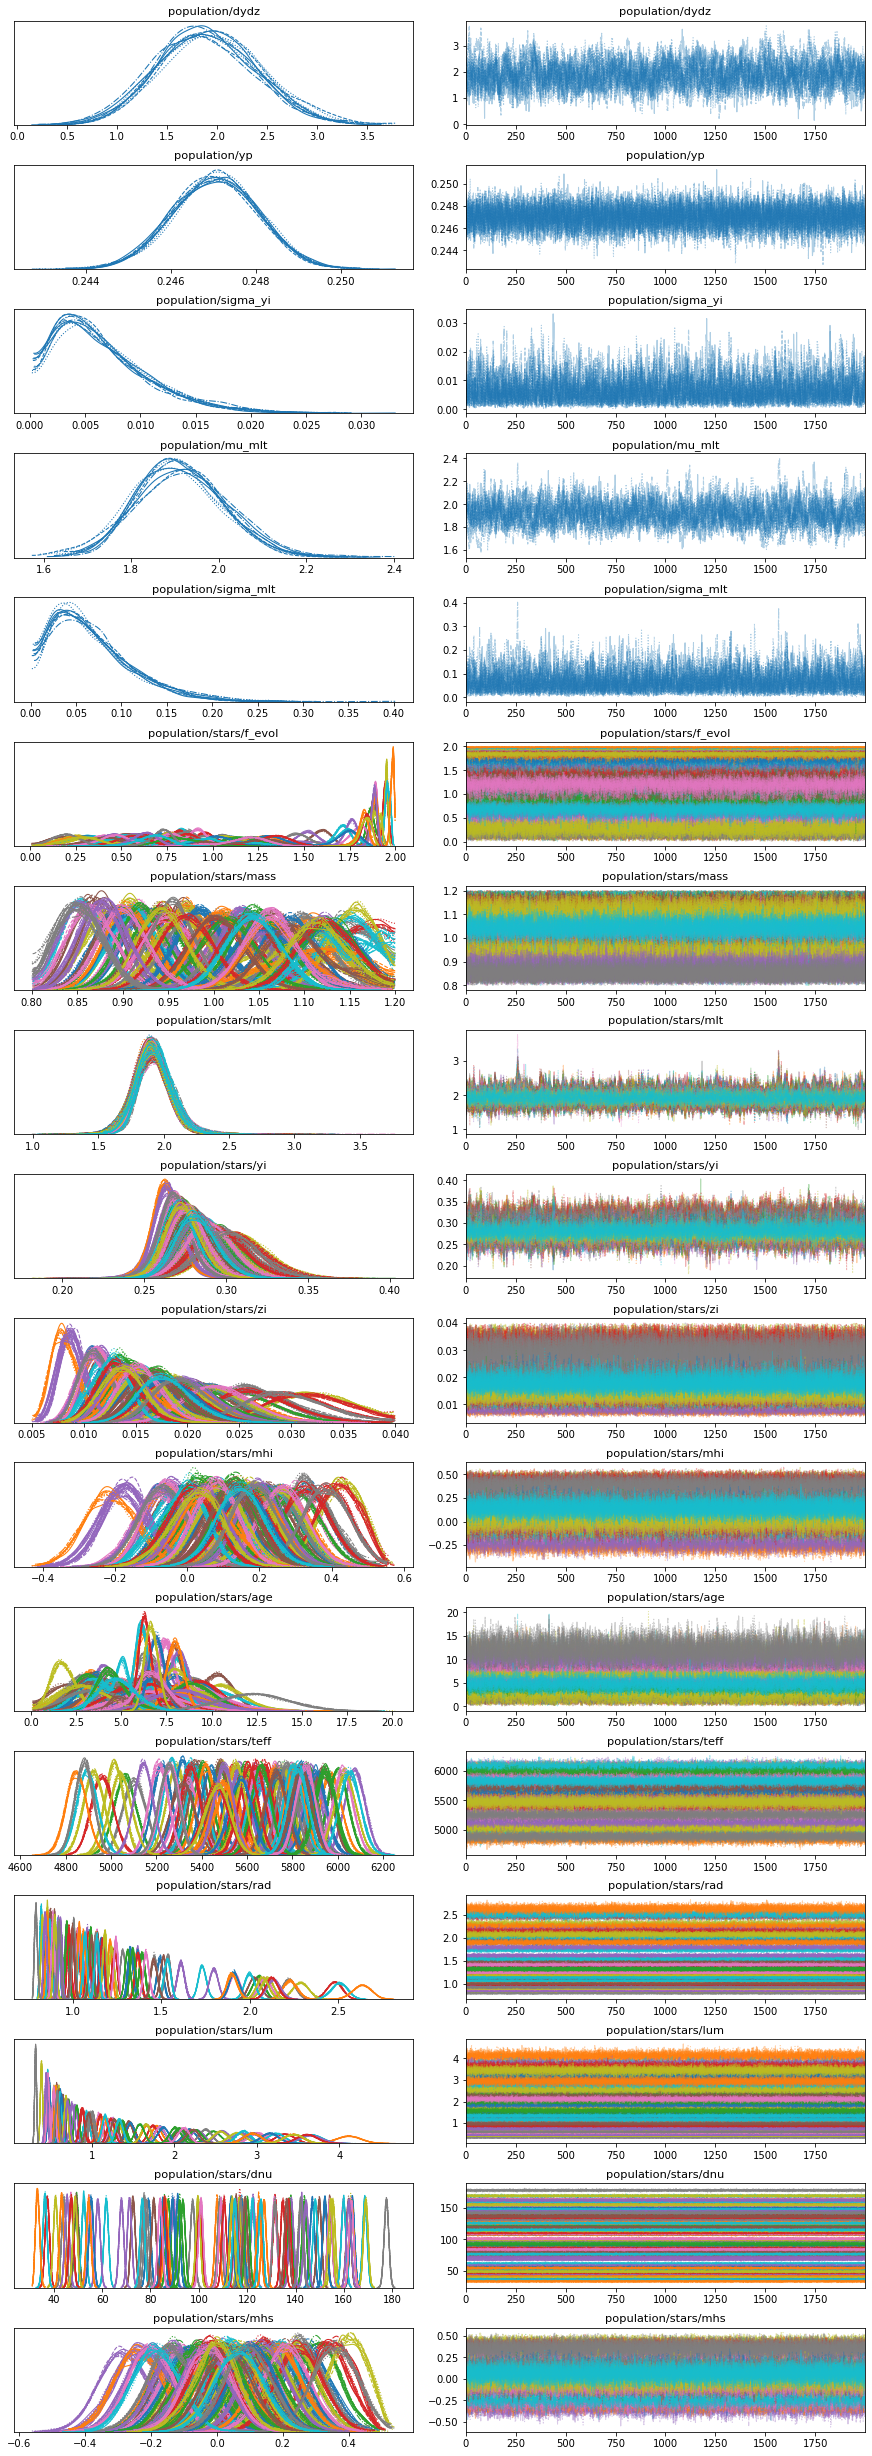

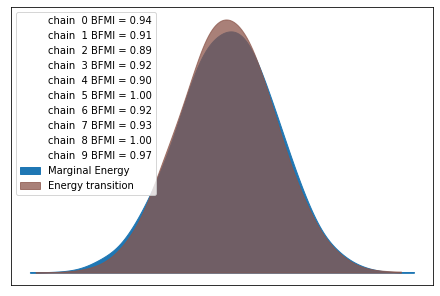

In [30]:
pop.plot_diagnostics(save=True);

In [31]:
pop.plot_corners(save=True)